### [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (K-Neighbors-Classifier)

- 테스트 데이터가 들어온 다음에 계산을 하기때문에 lazy learning 이라고도 불린다.

- 모델 학습 및 예측 순서
    1. 훈련 데이터를 공간에 분산 시킨다.
    2. 테스트 데이터 입력
    3. 입력된 점들을 기준으로 가까운 점들 모색
    4. 거리를 계산하며 가중치 계산
        - 거리(Distance)
            - Euclidean distance: 두 데이터의 직선거리
            - Manhattan distance: 두데이터의 절대값 거리
            - Minkowski distance: 위의 두 거리의 일반화
                - p 값이 2일때는 Euclidean 거리
                - p 값이 1일때는 Manhattan 거리
    5. 점들의 라벨을 조사하고, 가장 많은 라벨로 결정

### knn 파라미터 (scikit-learn)
- KNeighborsClassifier 의 하이퍼 파라미터
    1. n_neighbors : 입력된 점기준으로 몇개의 점을 찾을 지
    2. weights
        - uniform : 모든 점들의 가중치 가 같음
        - distance : 거리의 역수로 가중치 부여 (가까울 수록 높아지므로)
    3. metric = “minkowski”
    
    4. distance  
        * [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance): 두 데이터의 직선 거리
    
        * [Manhattan distance](https://ko.wikipedia.org/wiki/%EB%A7%A8%ED%95%B4%ED%8A%BC_%EA%B1%B0%EB%A6%AC): 두 데이터의 절대값 거리
    
        * [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance): 유클리디안과 맨하탄의 일반화
    
        Let ${\bf{A}} = (a_1, a_2,\ldots, a_n)$ and ${\bf{B}} = (b_1, b_2,\ldots, b_n)$ for all $a_i$ and $b_i$ in $\mathbb{R}$.
        
        $$\begin{equation}
        d({\bf{A}},{\bf{B}}) = \big(
        \sum_{i = 1}^n|a_i-b_i|^p
        \big)^{\frac{1}{p}}
        \end{equation}$$
    
        <img src = "https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=webp" width = 300 />
    
        * $p = 1$: Manhattan distance
        * $p = 2$: Euclidean distance
    4. n_jobs : CPU 코어 수 (-1 일 때는 모든 코어 사용)

### KNN에서의 최적의 K값 찾기
- k 값이 너무 작으면 모델은 너무 복잡 -> 오버피팅(과적합)
- k 값이 너무 크면 모델은 너무 단순 -> 언더피팅(과소적합)

**가장 적절한 k 값을 선택함으로써, 모델의 일반화 능력을 최대화 해야함**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
data = pd.read_csv("../../data/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
X = data[["age","trtbps"]]
y = data["output"]

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    )

In [9]:
model_knn = KNeighborsClassifier(n_neighbors=3) #, weights="uniform", n_jobs=-1, metric='minkowski', p=2) # distance 는 가까울수록 점수가 높아야 되므로 역수로 부여한다.
model_knn.fit(x_train.values,y_train.values)
predi_knn = model_knn.predict(x_test.values)

print(metrics.accuracy_score(predi_knn, y_test))

0.4835164835164835


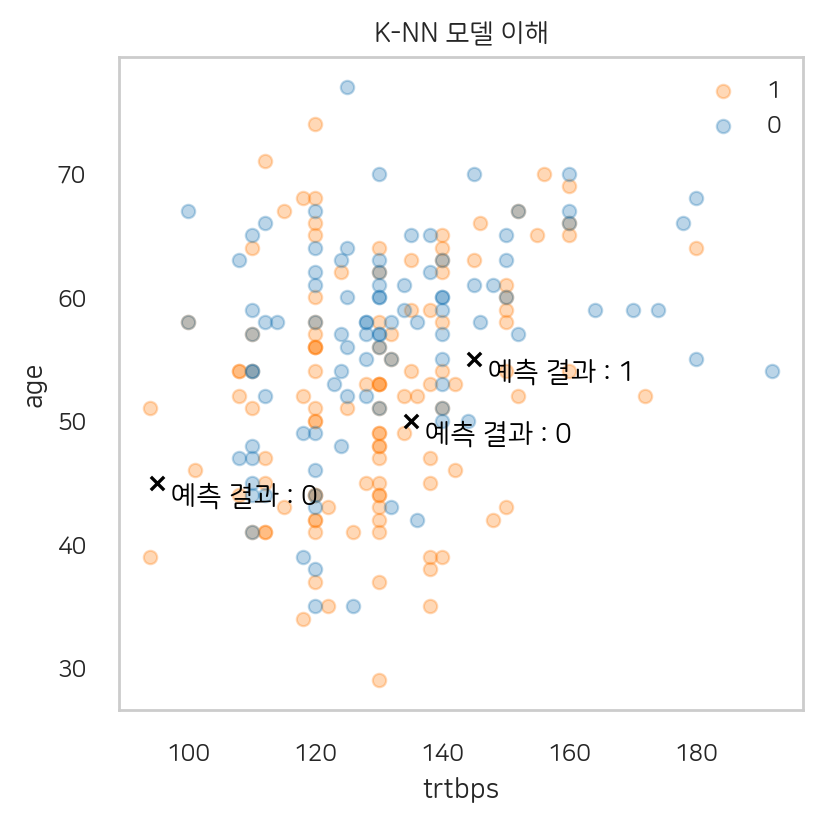

In [10]:
feature_x = "trtbps"
feature_y = "age"

data_train = data.loc[x_train.index]

# 임의의 테스트 데이터
test_data_x = np.array([[95.0, 45.0],
                        [145.0, 55.0],
                        [135.0, 50.0]])

# 훈련된 모델을 사용하여 테스트 데이터의 레이블을 예측
predicted_labels_x = model_knn.predict(test_data_x)

# 산점도를 설정하고 주석을 추가
fig, ax = plt.subplots(figsize=(4, 4))
data_train = data.loc[x_train.index]

# 훈련 데이터를 'output'에 따라 색상을 달리하여 플롯
for s, c in zip(data_train["output"].unique(), ["tab:orange", "tab:blue"]):
    ax.scatter(data_train[data_train["output"] == s][feature_x],
               data_train[data_train["output"] == s][feature_y],
               color=c,
               alpha=0.3,
               label=s)

# 축 라벨과 제목 설정
ax.set(xlabel=feature_x, ylabel=feature_y, title="K-NN 모델 이해")
ax.grid()
ax.legend()

# 테스트 데이터 포인트와 예측된 레이블을 플롯
for point, label in zip(test_data_x, predicted_labels_x):
    ax.scatter(point[0], point[1], color='black', marker='x')
    ax.text(point[0], point[1], "  예측 결과 : "+str(label), color="black", fontsize=10, verticalalignment='top')

### 적당한 k값 구하기 with 교차 검증

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
# k 값에 따른 교차 검증 점수 저장
k_range = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-겹 교차 검증 사용
    k_scores.append(scores.mean())
    print(f"{scores.mean():0.2f},",end='')
print()
# 최적의 k 값 출력
optimal_k = k_range[np.argmax(k_scores)] # np.argmax 함수 : 주어진 배열에서 최대값의 인덱스를 반환
print(f"최적의 k: {optimal_k}")


0.56,0.54,0.52,0.54,0.58,0.58,0.58,0.57,0.57,0.57,0.58,0.59,0.59,0.56,0.58,0.59,0.59,0.60,0.60,0.59,0.60,0.62,0.59,0.62,0.62,0.60,0.60,0.59,0.60,
최적의 k: 25


In [13]:
# 데이터 포인트 수의 제곱근을 사용한 k 설정
n = len(X)
k = np.sqrt(n)

# 홀수로 설정
if k % 2 == 0:
    k += 1

print(f"제안된 k 값: {int(k)}")


제안된 k 값: 17


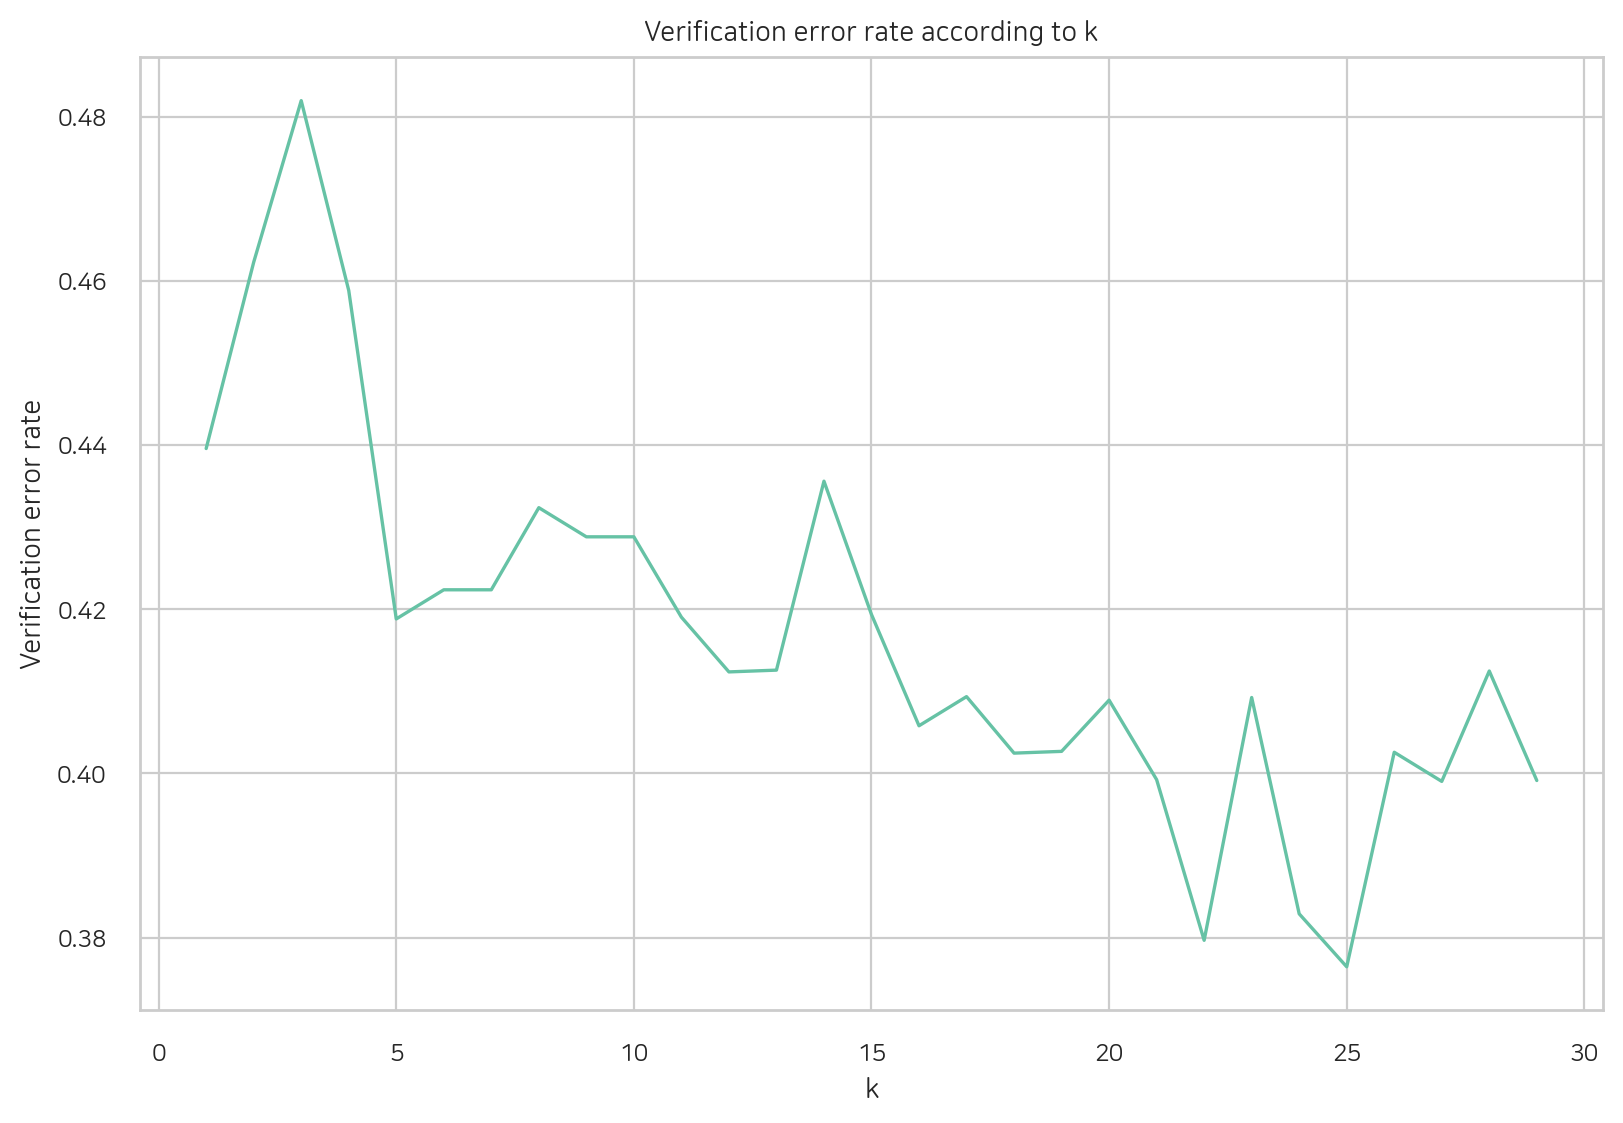

In [14]:
import matplotlib.pyplot as plt

# 오류율 그래프 그리기
plt.plot(k_range, [1 - score for score in k_scores])
plt.xlabel('k')
plt.ylabel('Verification error rate')
plt.title('Verification error rate according to k')
plt.show()
